In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data to inspect its structure and start the analysis
file_path = '/Users/kudzanaikutsanzira/Downloads/rural_population_data_edit_202411051725.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
display(data.head())
data.info()


,country_name,year,individuals_using_internet_population,population_total,population_growth_percent,rural_population_percent,access_to_electricity_rural_percent,access_to_electricity_percent,individuals_using_internet_count
0,Angola,2012,7.7000,25188292.0,3.758703,38.732,13591.157631,37.3,1.939498e+06
1,Angola,2013,13.0000,26147002.0,3.735525,37.998,4776.231938,38.4,3.399110e+06
2,Angola,2014,21.3623,27128337.0,3.684429,37.269,6427.512768,32.0,5.795237e+06
3,Angola,2015,22.0000,28127721.0,3.617678,36.554,3.800000,42.0,6.188099e+06
4,Angola,2016,23.2000,29154746.0,3.586211,35.851,-68913.145806,41.8,6.763901e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country_name                           143 non-null    object 
 1   year                                   143 non-null    int64  
 2   individuals_using_internet_population  143 non-null    float64
 3   population_total                       143 non-null    float64
 4   population_growth_percent              143 non-null    float64
 5   rural_population_percent               143 non-null    float64
 6   access_to_electricity_rural_percent    143 non-null    float64
 7   access_to_electricity_percent          143 non-null    float64
 8   individuals_using_internet_count       143 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.2+ KB


In [6]:
# Descriptive Statistics
descriptive_stats = data.describe()
display(descriptive_stats)


,year,individuals_using_internet_population,population_total,population_growth_percent,rural_population_percent,access_to_electricity_rural_percent,access_to_electricity_percent
count,143.000000,1.430000e+02,1.430000e+02,143.000000,143.000000,1.430000e+02,143.000000
mean,2017.000000,-1.269578e+08,3.612199e+07,2.287277,58.461545,-5.639409e+04,48.698601
std,3.173393,1.518194e+09,4.898857e+07,0.717972,18.156233,5.968231e+05,21.014288
min,2012.000000,-1.815497e+10,2.054718e+06,0.387278,27.776000,-7.132176e+06,7.400000
25%,2014.000000,1.345000e+01,1.150570e+07,1.878306,42.972000,1.215000e+01,35.250000
50%,2017.000000,2.410000e+01,1.892772e+07,2.339383,57.024000,2.680000e+01,47.400000
75%,2020.000000,3.806505e+01,4.333744e+07,2.758573,74.319000,3.740000e+01,59.750000
max,2022.000000,7.732720e+01,2.185412e+08,3.758703,84.188000,1.359116e+04,90.000000


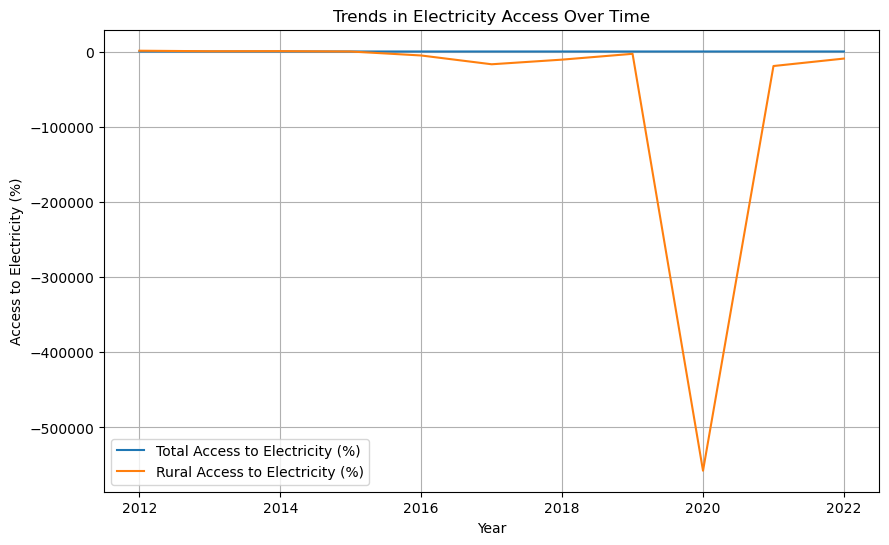

In [24]:
# Yearly trends in electricity access
yearly_data = data.groupby('year')[['access_to_electricity_percent', 'access_to_electricity_rural_percent']].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data['access_to_electricity_percent'], label='Total Access to Electricity (%)')
plt.plot(yearly_data.index, yearly_data['access_to_electricity_rural_percent'], label='Rural Access to Electricity (%)')
plt.title('Trends in Electricity Access Over Time')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (%)')
plt.legend()
plt.grid(True)
plt.show()


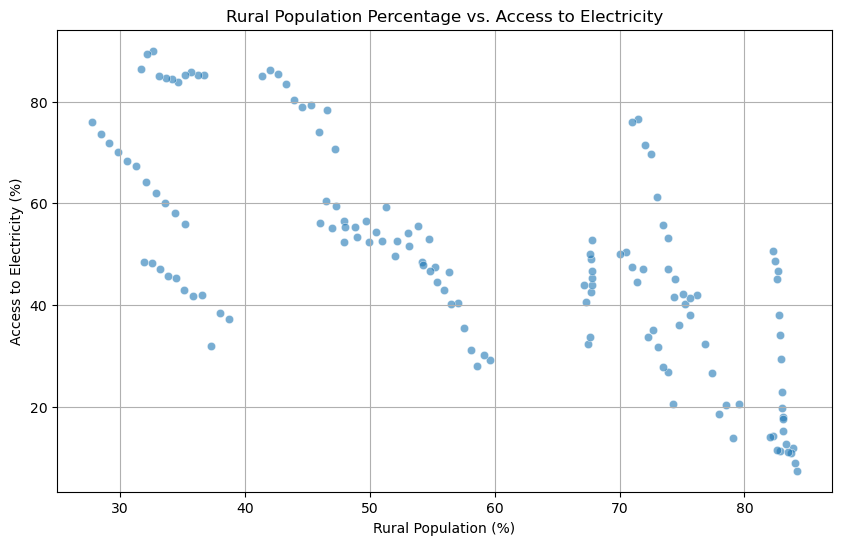

In [25]:
# Scatter plot to analyze relationship between rural population and electricity access
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='rural_population_percent', y='access_to_electricity_percent', alpha=0.6)
plt.title('Rural Population Percentage vs. Access to Electricity')
plt.xlabel('Rural Population (%)')
plt.ylabel('Access to Electricity (%)')
plt.grid(True)
plt.show()


In [9]:
# Correlation analysis
correlation = data[['rural_population_percent', 'access_to_electricity_percent']].corr()
display(correlation)


,rural_population_percent,access_to_electricity_percent
rural_population_percent,1.000000,-0.710556
access_to_electricity_percent,-0.710556,1.000000


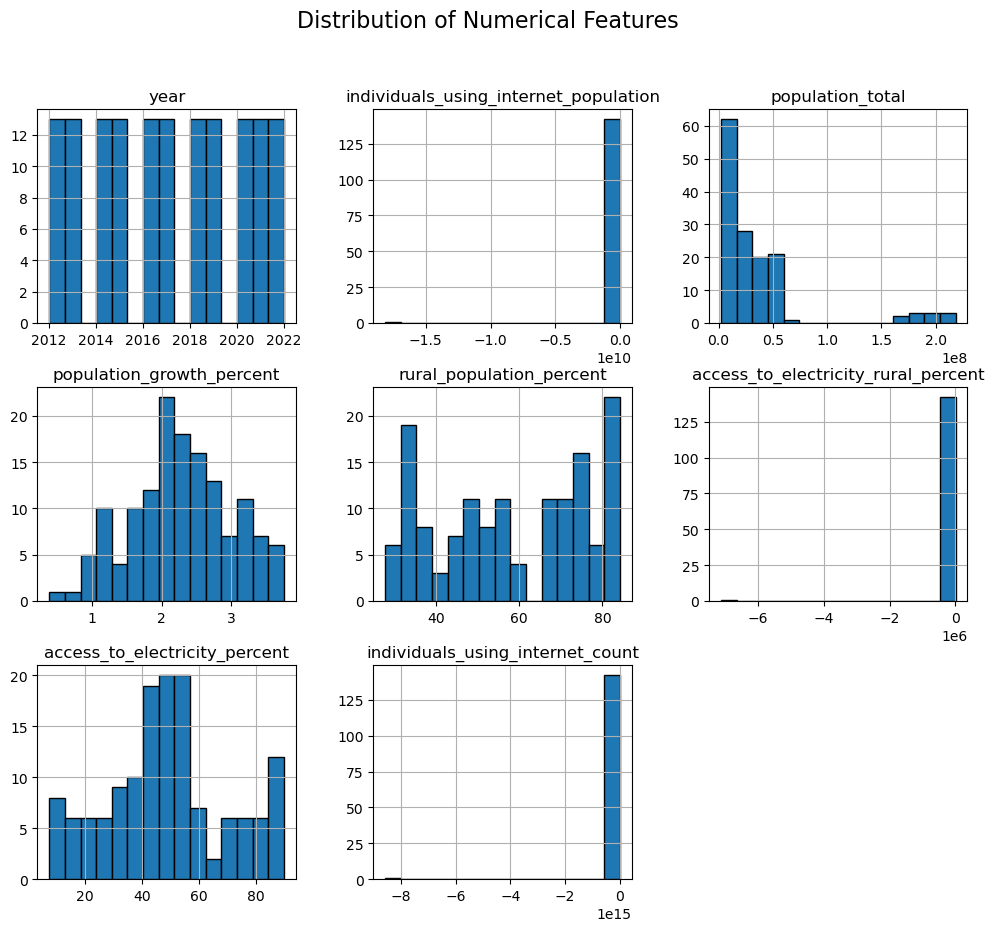

In [26]:
# Histograms for numerical columns
data.hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


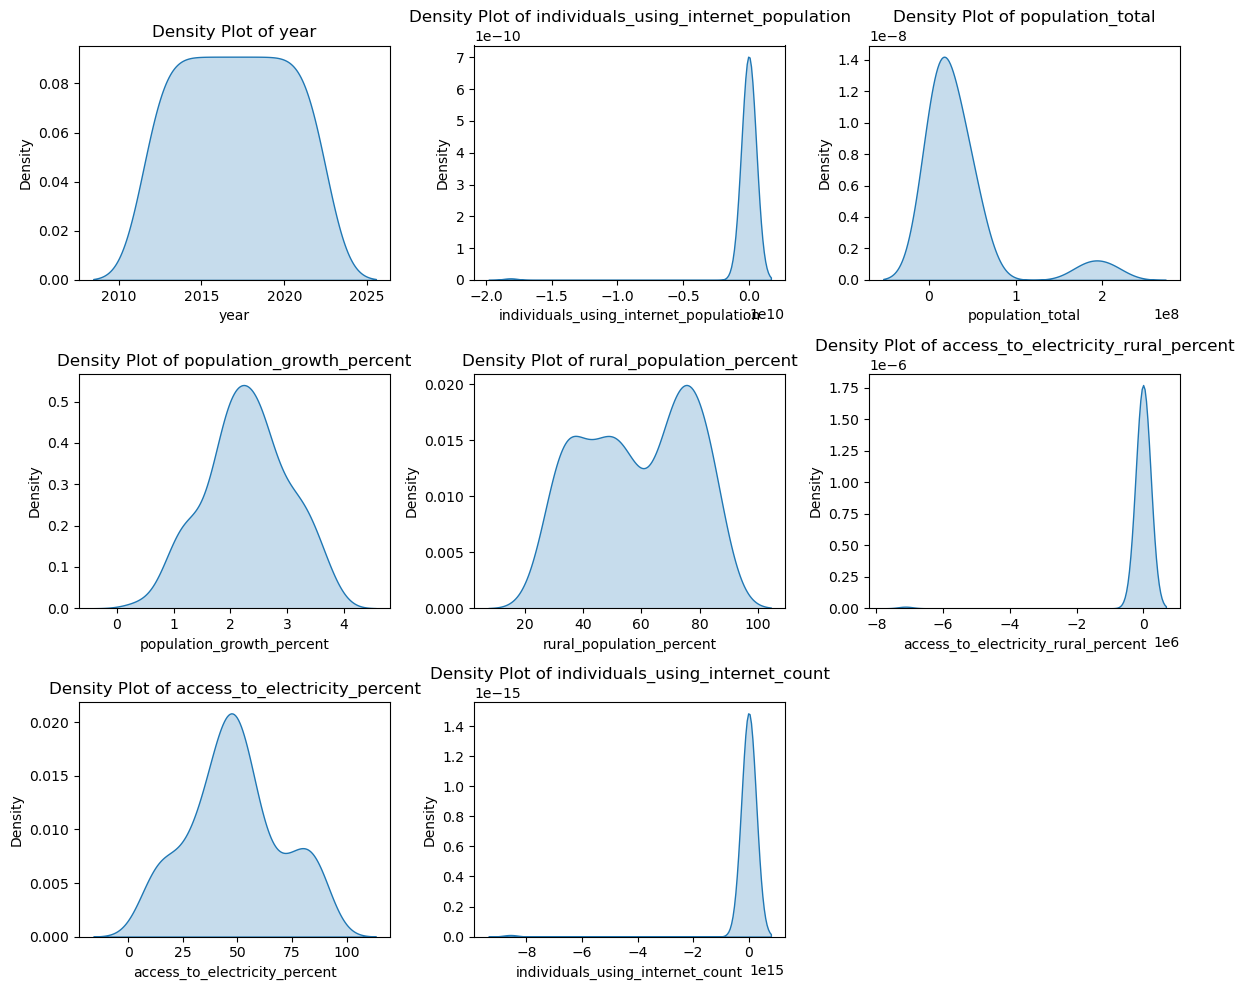

In [27]:
# Density plots for numerical columns
import seaborn as sns

plt.figure(figsize=(12, 10))
for i, column in enumerate(data.select_dtypes(include=['float', 'int']).columns, 1):
    plt.subplot(3, 3, i)  # Adjust based on the number of plots needed
    sns.kdeplot(data[column], fill=True)
    plt.title(f'Density Plot of {column}')
plt.tight_layout()
plt.show()


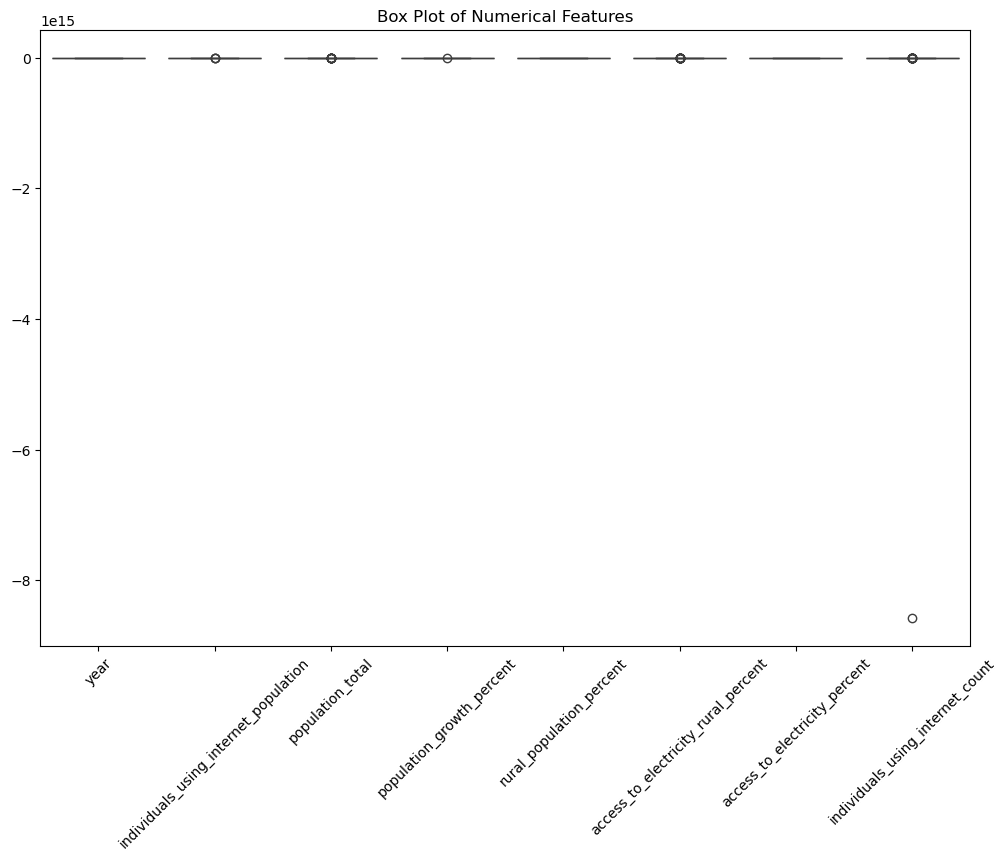

In [28]:
# Box plots to check for outliers in numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include=['float', 'int']))
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


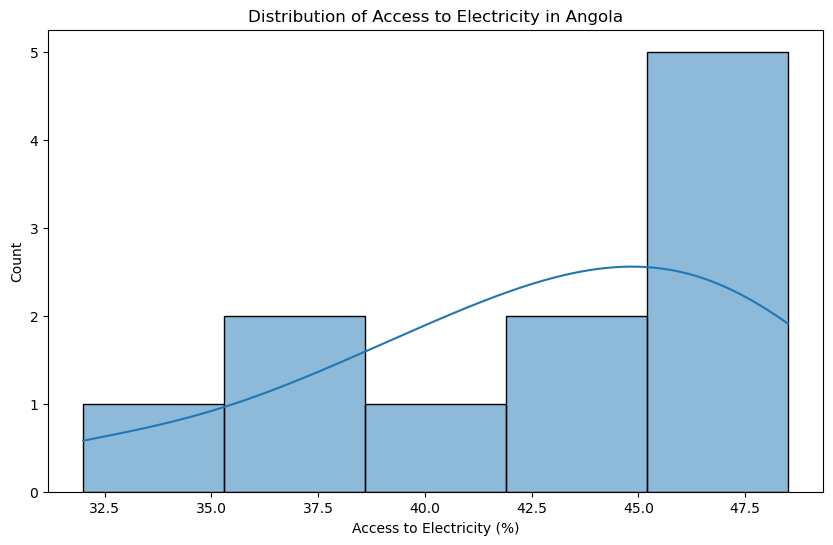

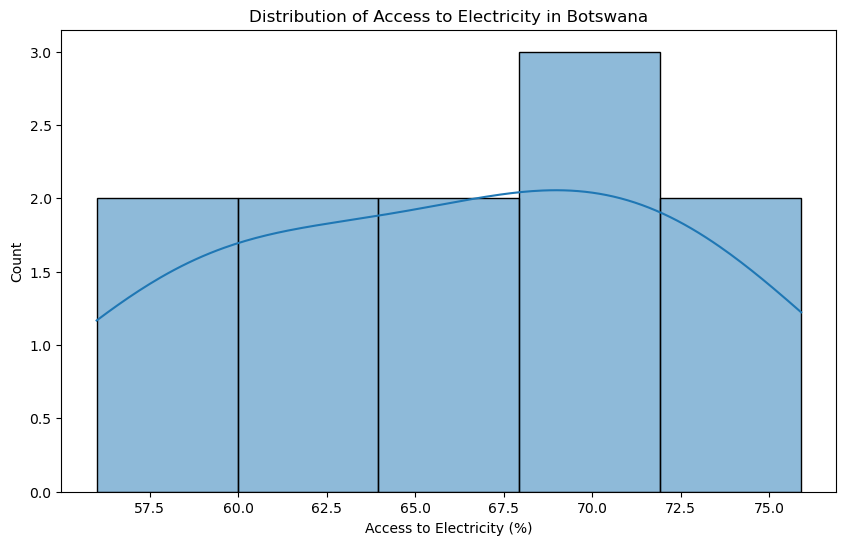

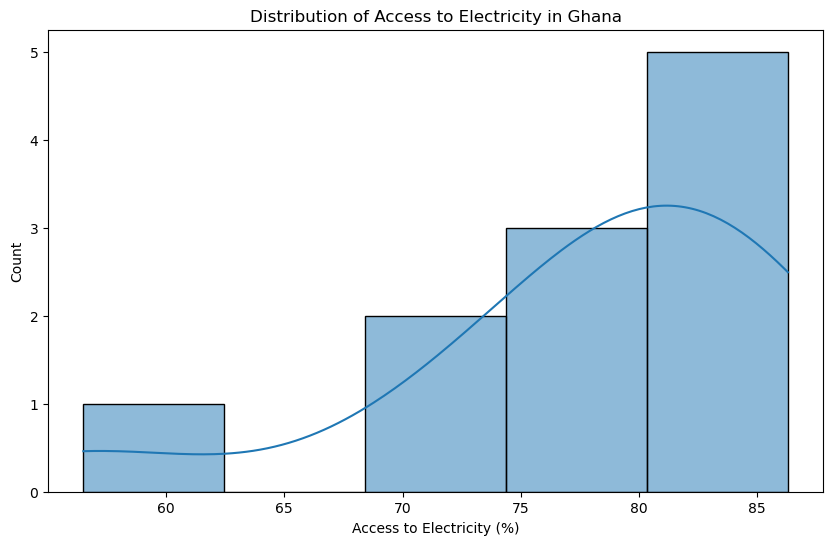

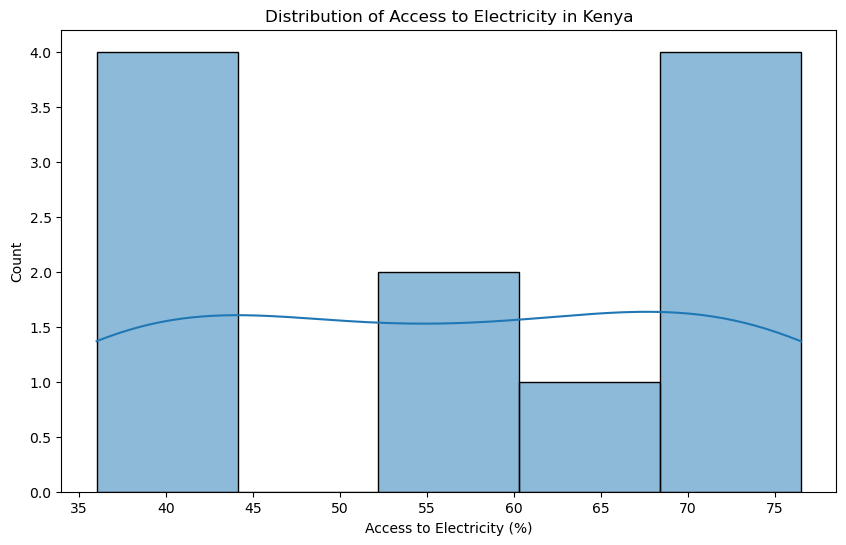

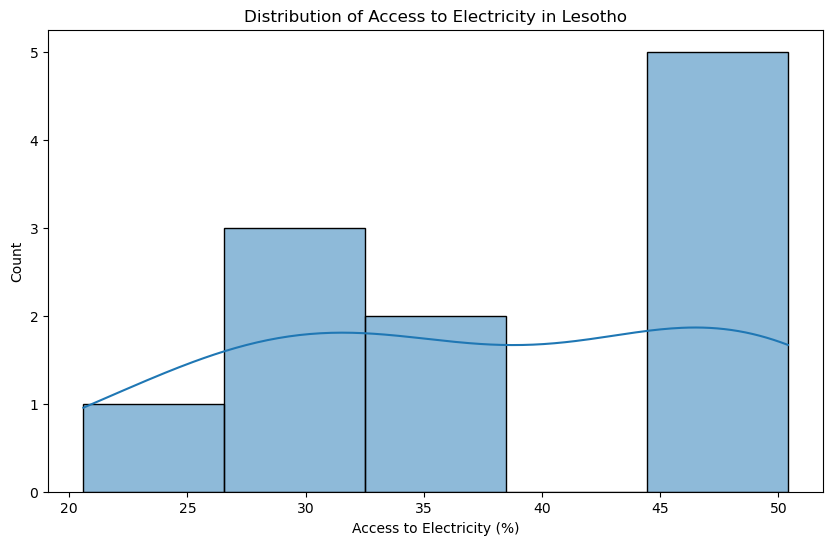

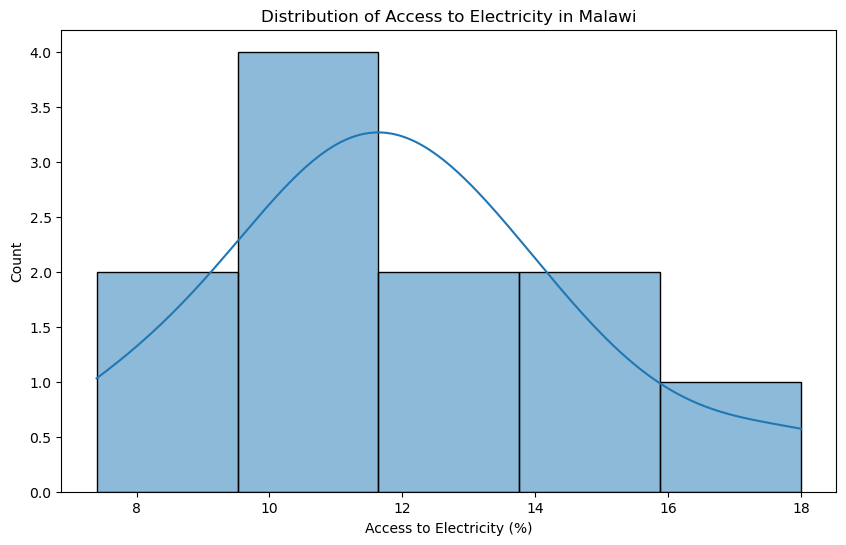

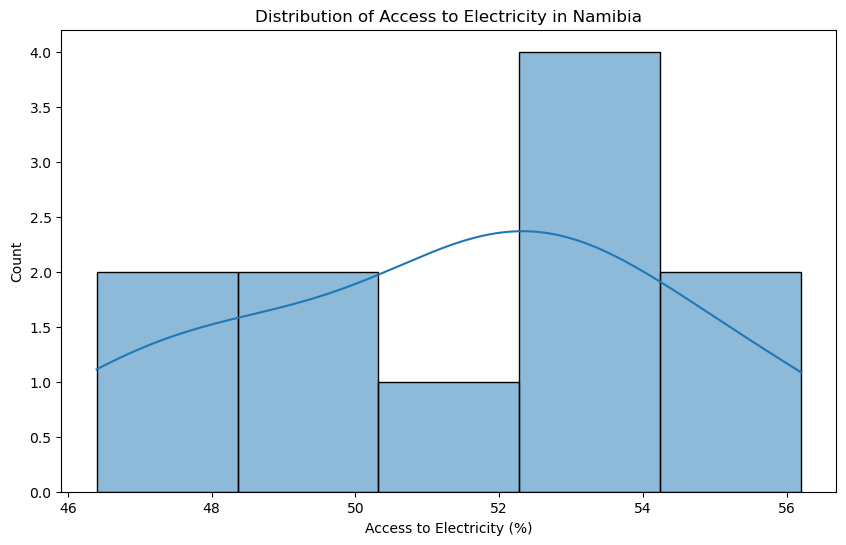

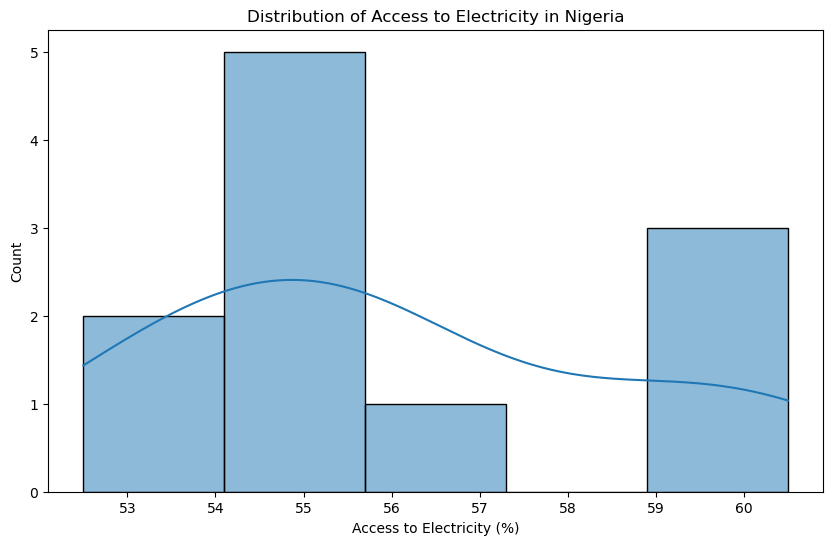

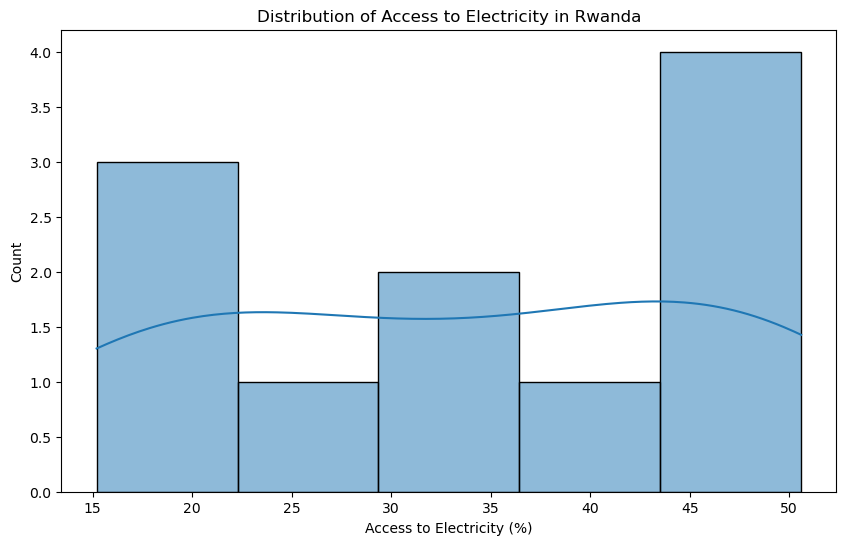

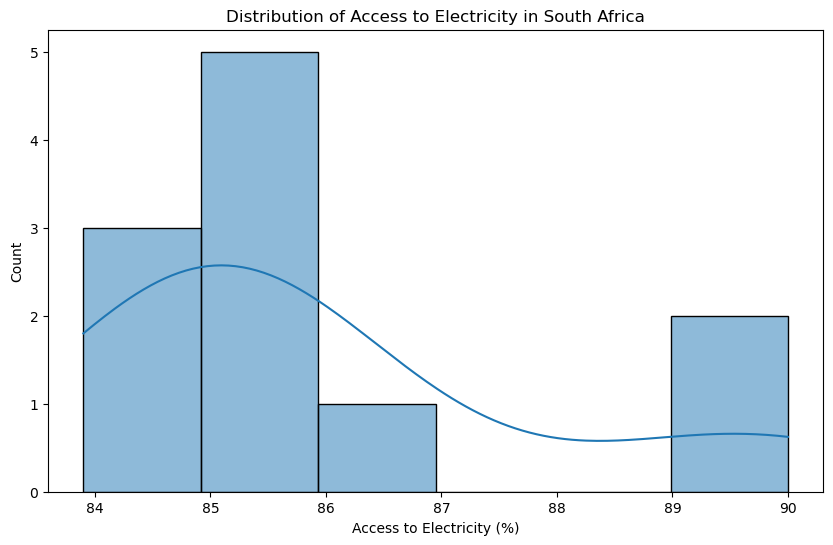

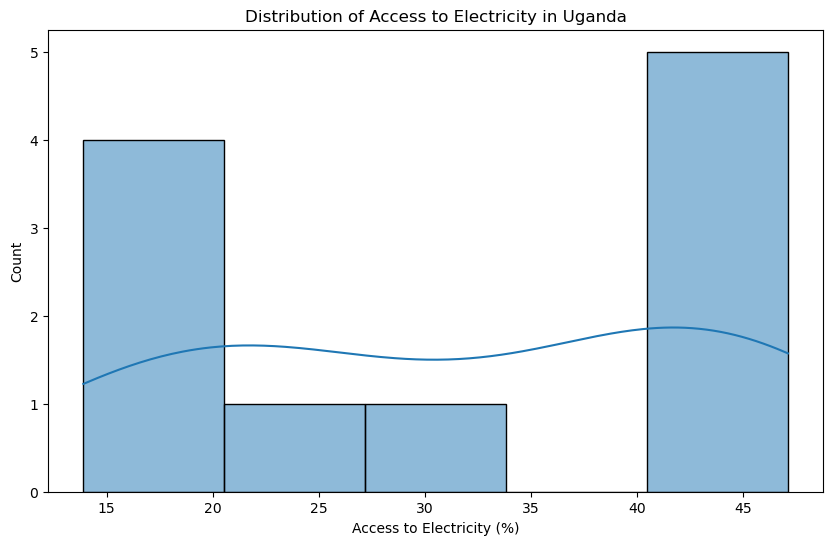

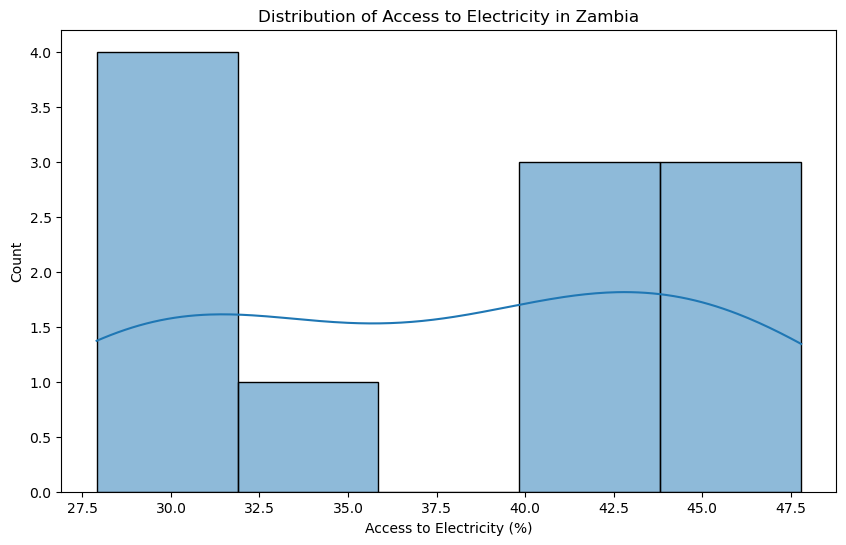

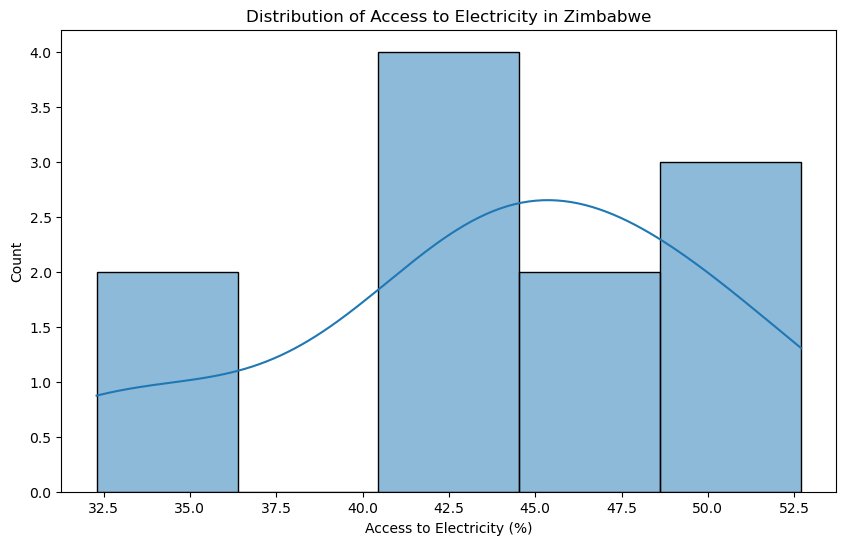

In [29]:
# Filter data for each country and plot separately

# Plotting distributions of access to electricity by country
import matplotlib.pyplot as plt
import seaborn as sns

unique_countries = data['country_name'].unique()

# Loop through each country and plot histogram or KDE
for country in unique_countries:
    country_data = data[data['country_name'] == country]
    plt.figure(figsize=(10, 6))
    sns.histplot(country_data['access_to_electricity_percent'], kde=True)
    plt.title(f'Distribution of Access to Electricity in {country}')
    plt.xlabel('Access to Electricity (%)')
    plt.show()


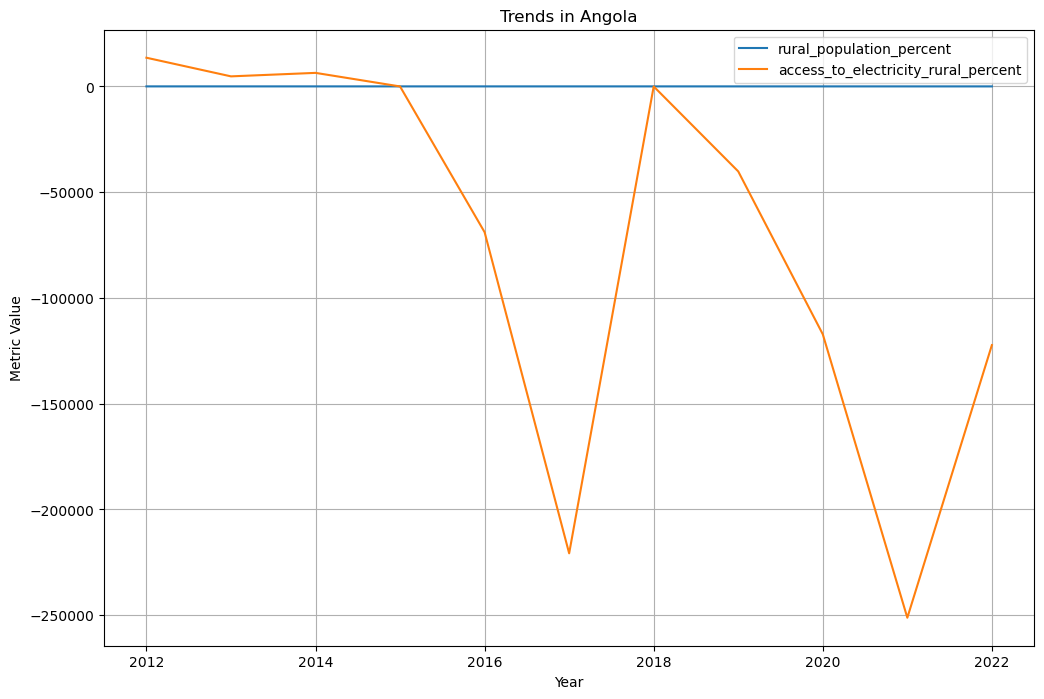

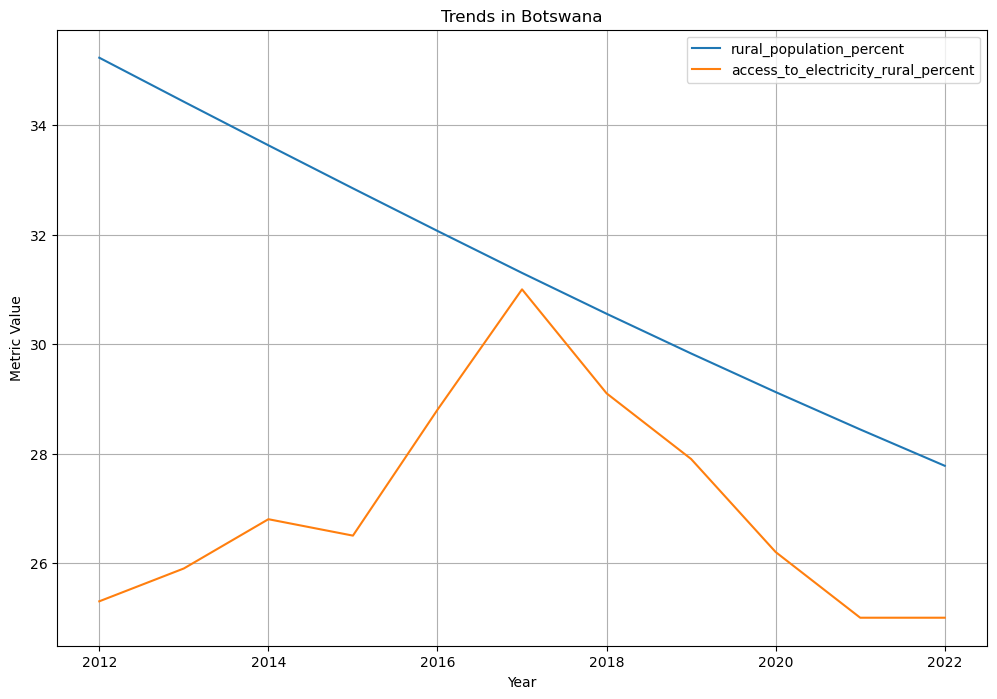

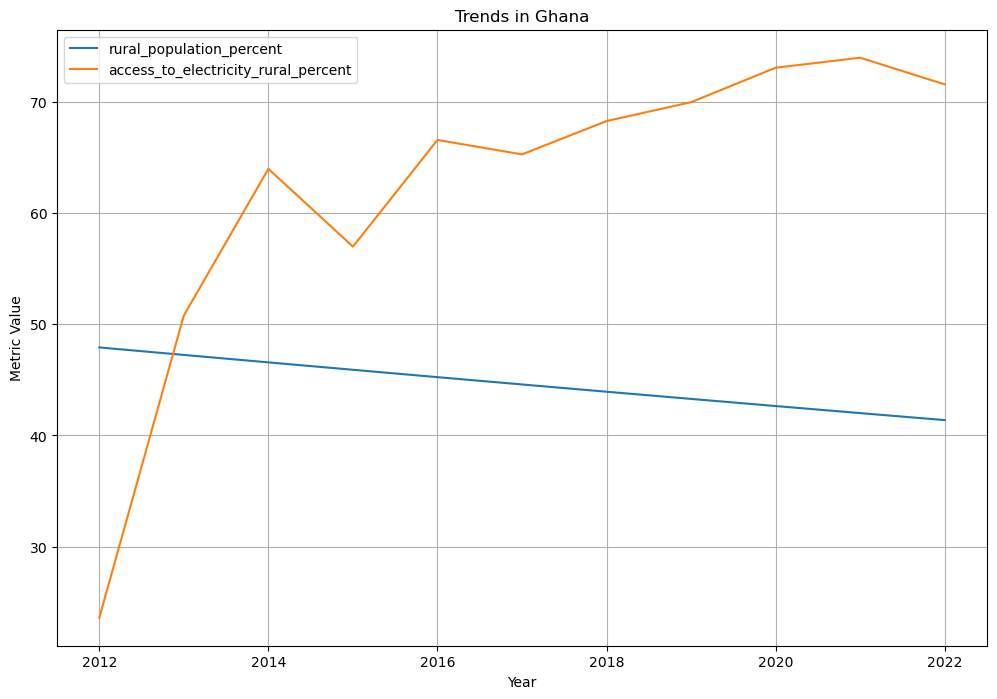

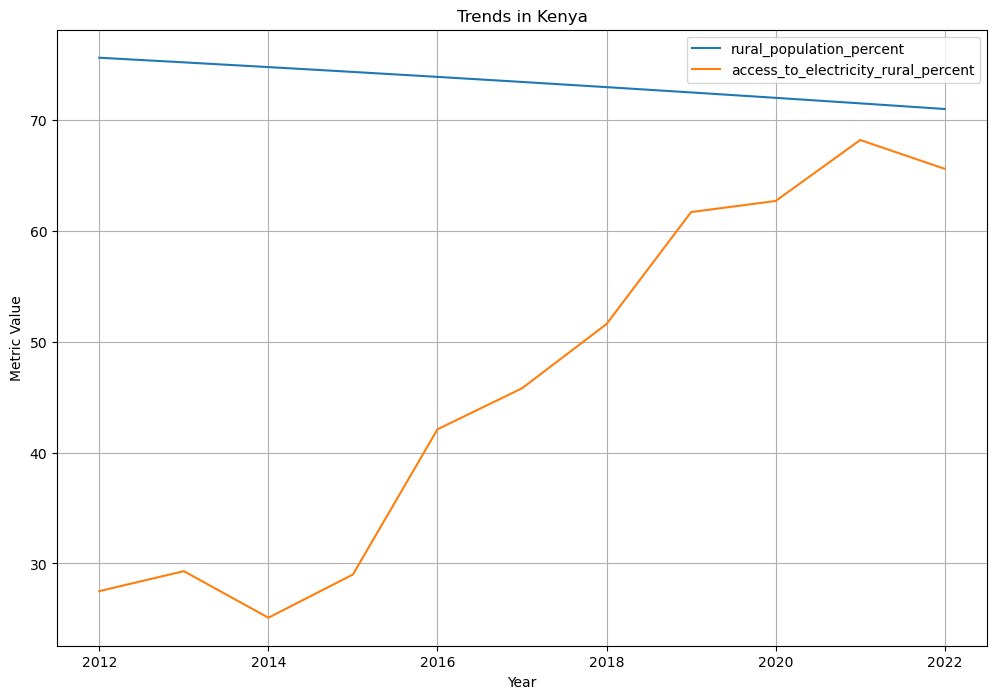

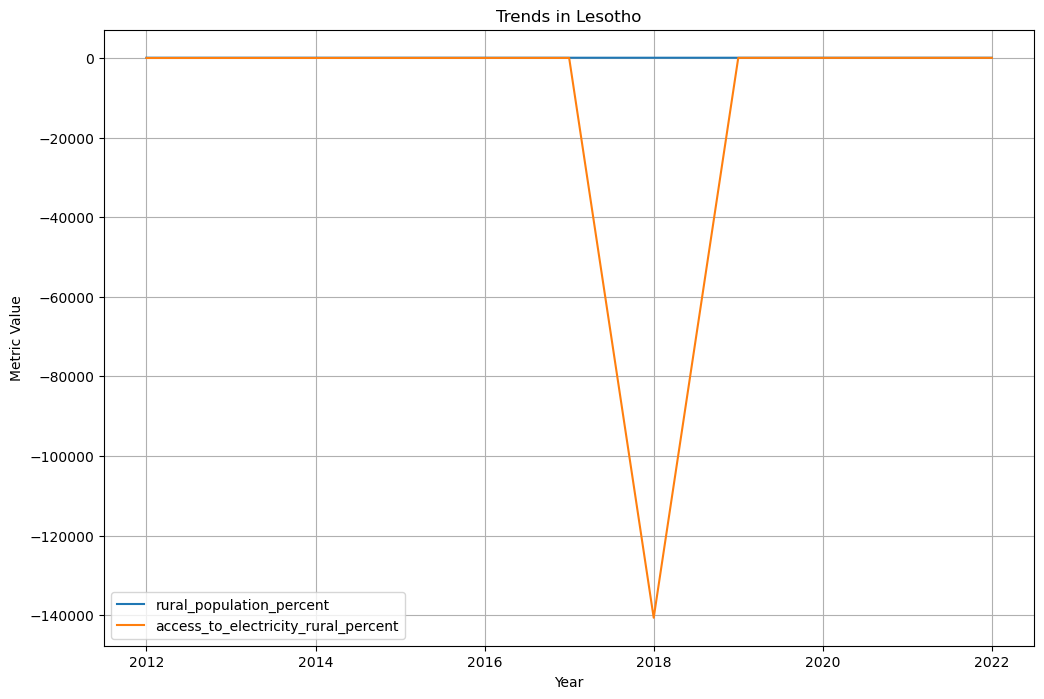

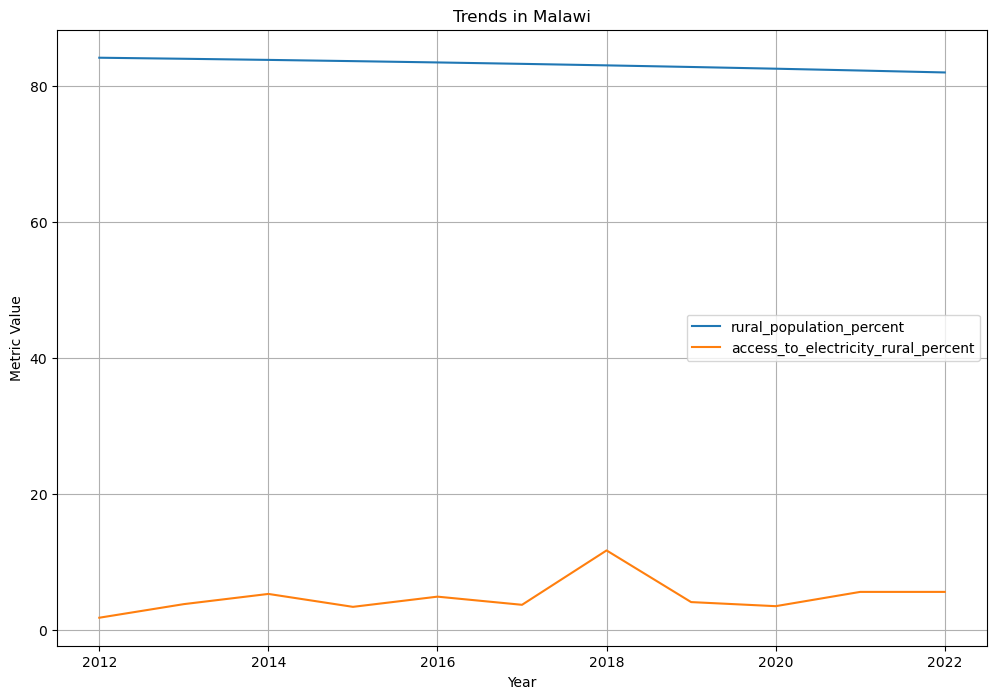

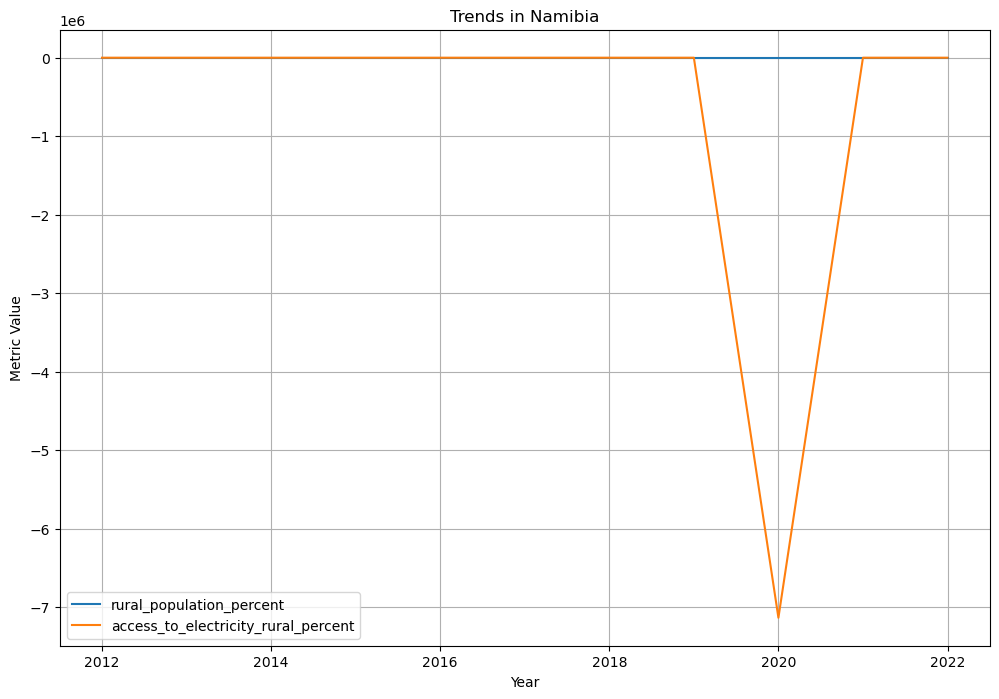

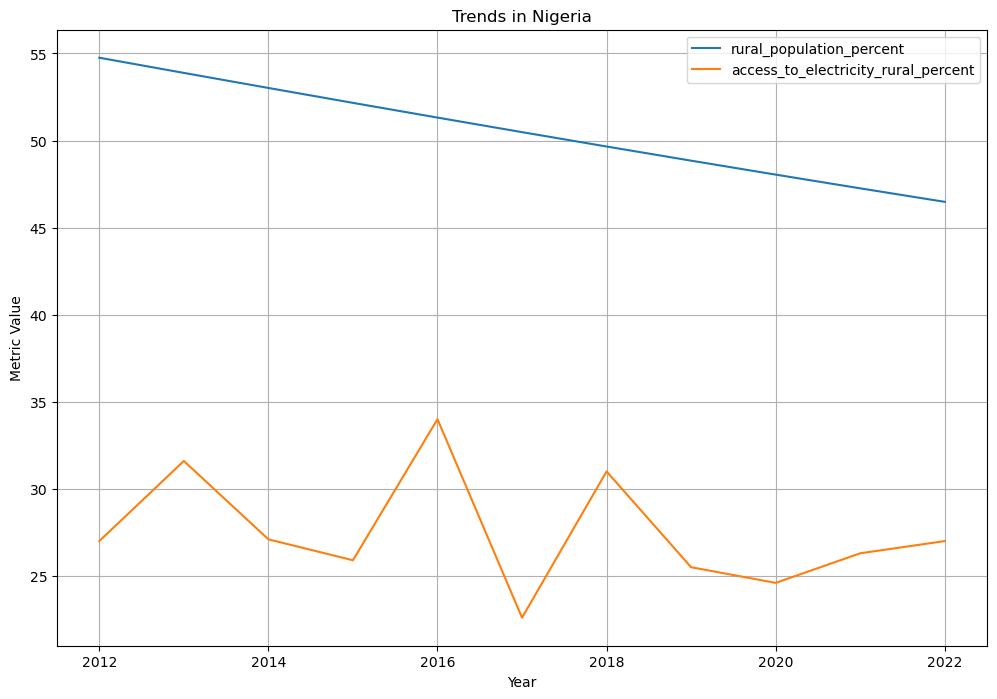

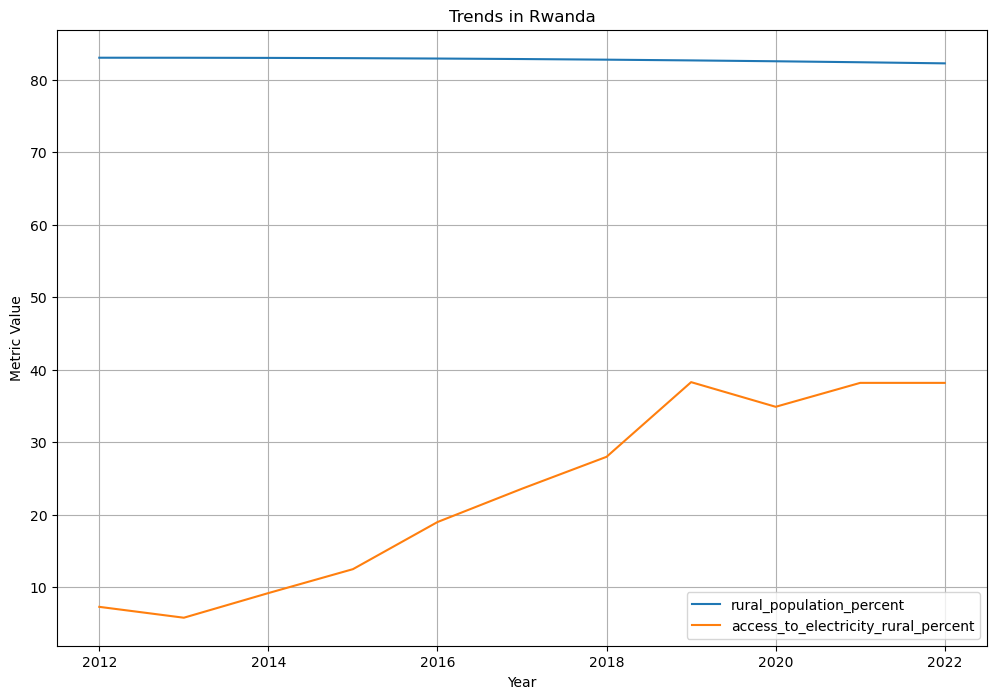

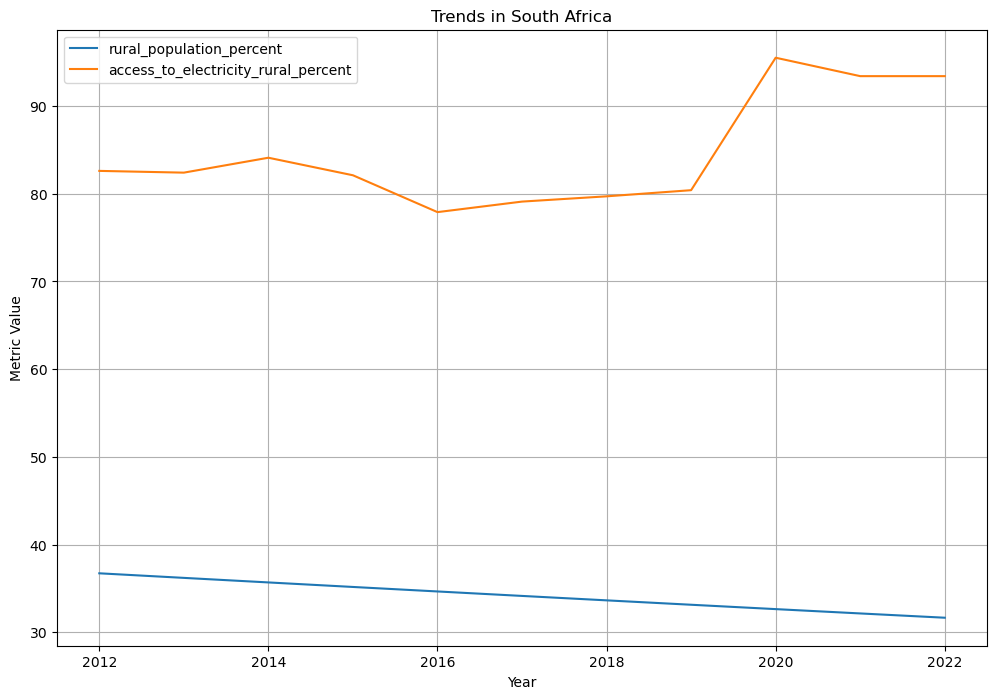

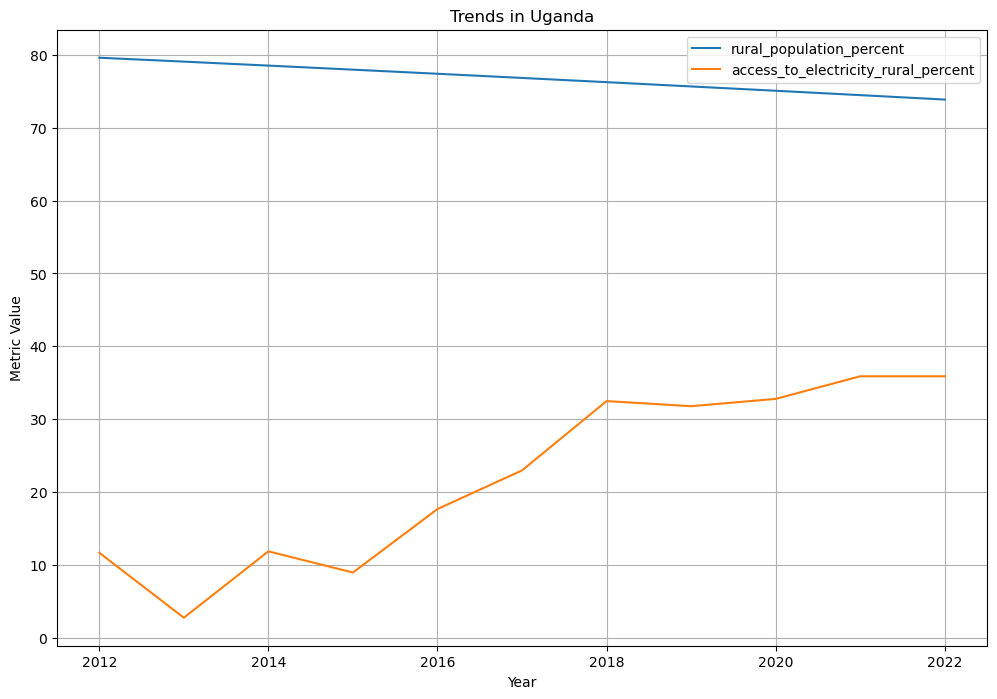

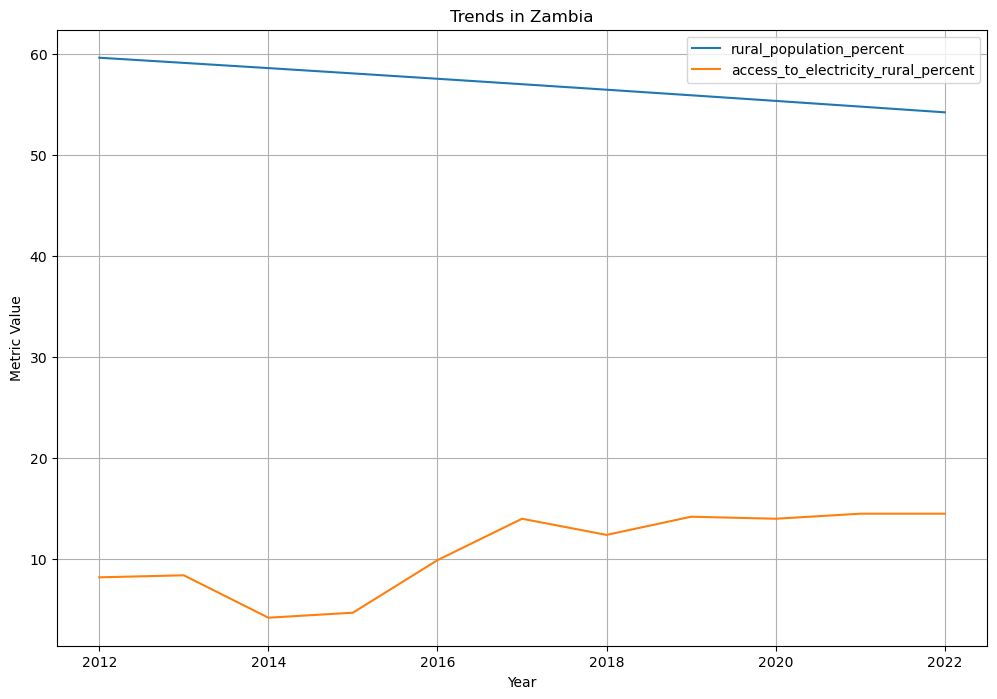

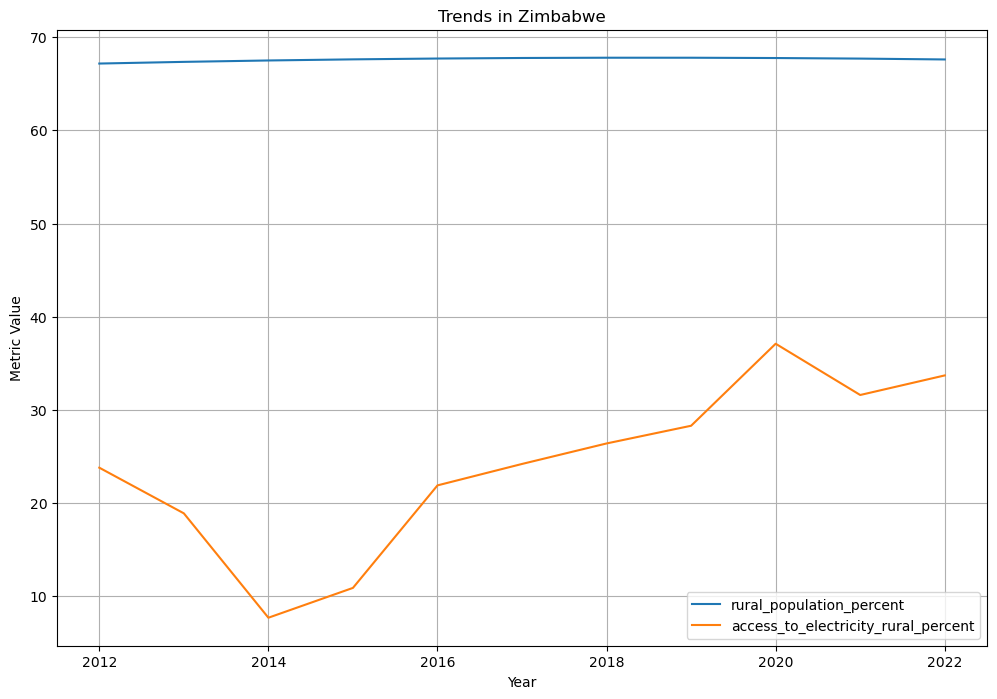

In [30]:
import matplotlib.pyplot as plt

# Set the metric to analyze over time
metrics = ['rural_population_percent', 'access_to_electricity_rural_percent']

# Loop through each country and plot trends over time for each metric
unique_countries = data['country_name'].unique()

for country in unique_countries:
    country_data = data[data['country_name'] == country].sort_values(by='year')
    
    plt.figure(figsize=(12, 8))
    for metric in metrics:
        plt.plot(country_data['year'], country_data[metric], label=metric)
        
    plt.title(f'Trends in {country}')
    plt.xlabel('Year')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True)
    plt.show()


import matplotlib.pyplot as plt

# Updated metric list to include total population and internet users
metrics = [
    'population_total',
    'population_growth_percent',
    'rural_population_percent',
    'access_to_electricity_rural_percent',
    'access_to_electricity_percent',
    'individuals_using_internet_percent'  
]

unique_countries = data['country_name'].unique()

# Loop through each country and plot trends over time for each metric
for country in unique_countries:
    country_data = data[data['country_name'] == country].sort_values(by='year')
    
    plt.figure(figsize=(12, 8))
    for metric in metrics:
        if metric in country_data.columns:  # Check if the metric exists in the data
            plt.plot(country_data['year'], country_data[metric], label=metric)
    
    plt.title(f'Growth Trends in {country}')
    plt.xlabel('Year')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True)
    plt.show()



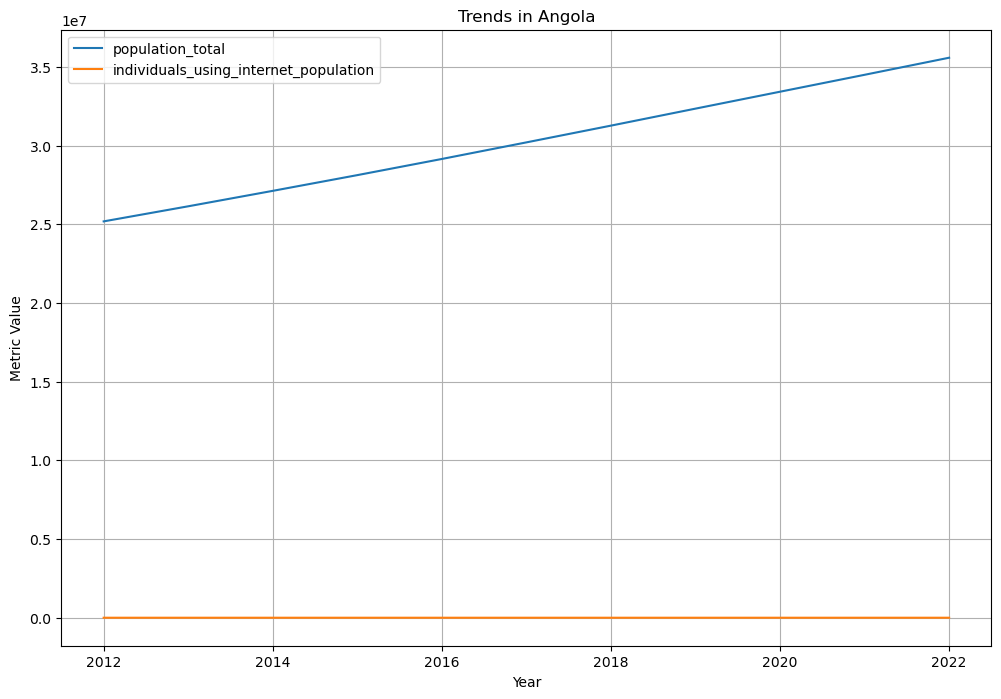

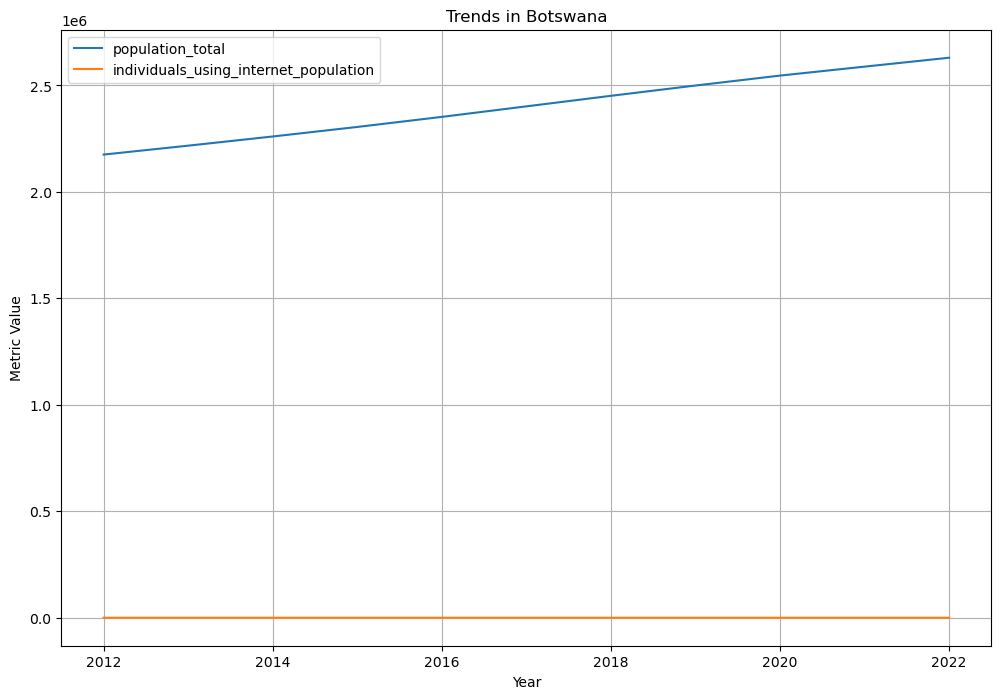

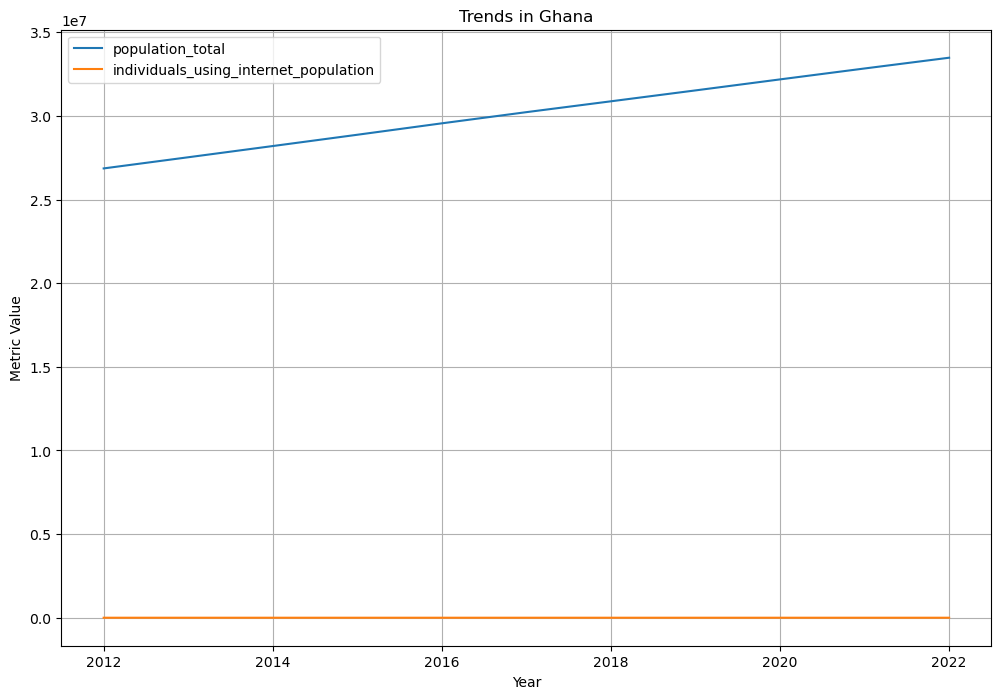

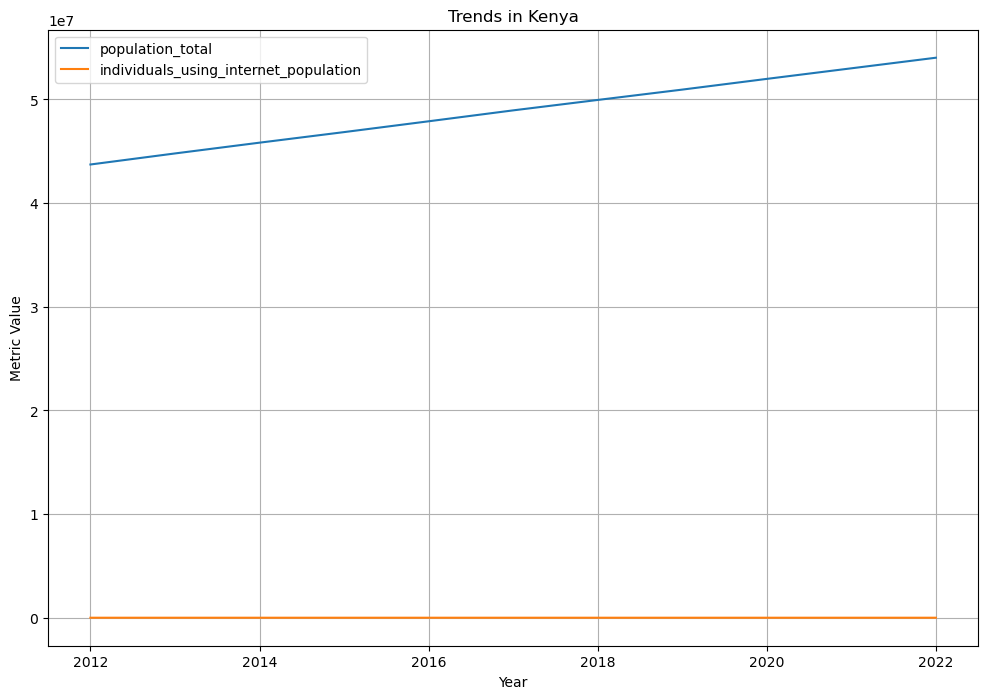

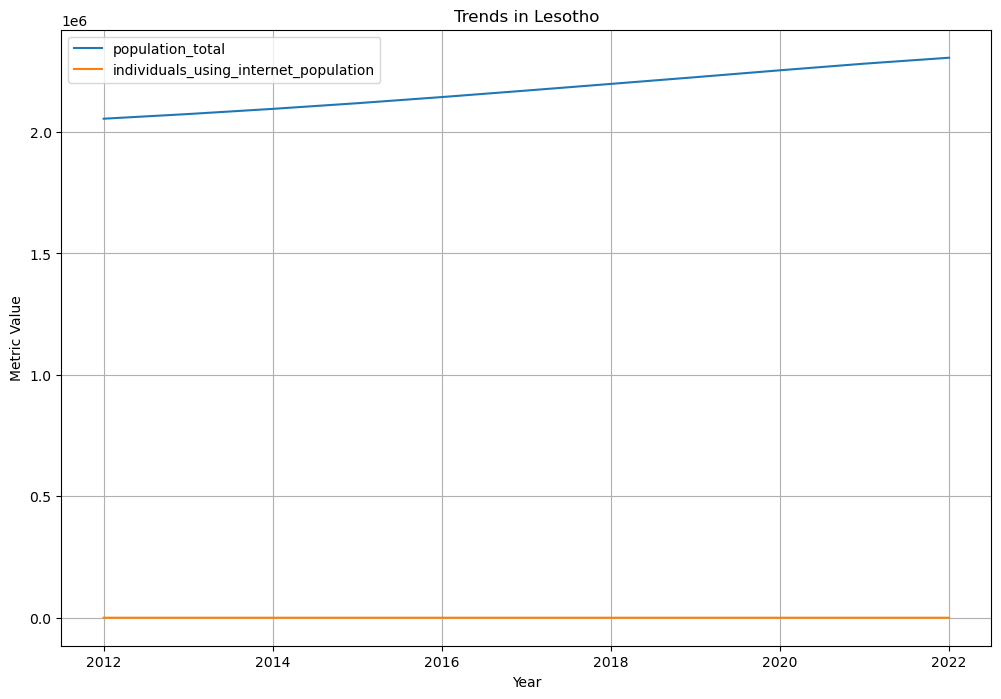

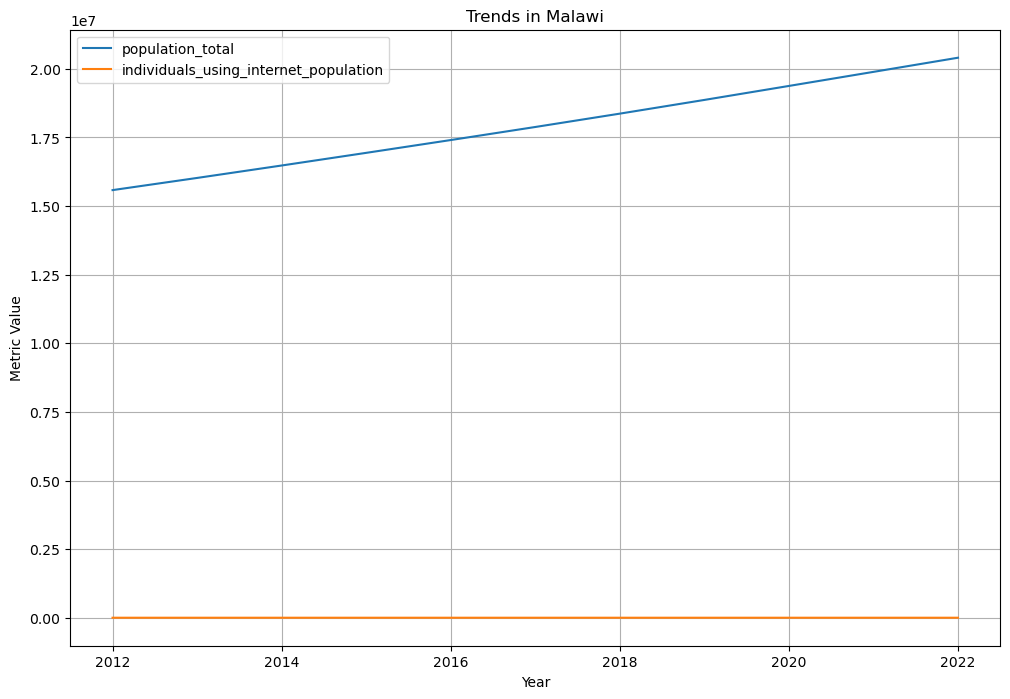

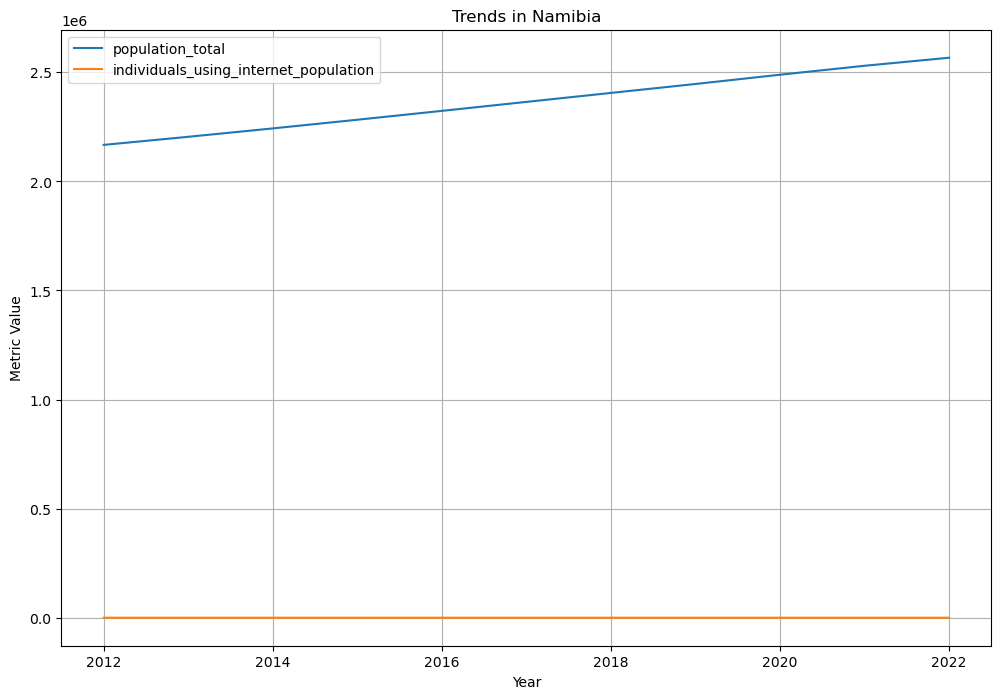

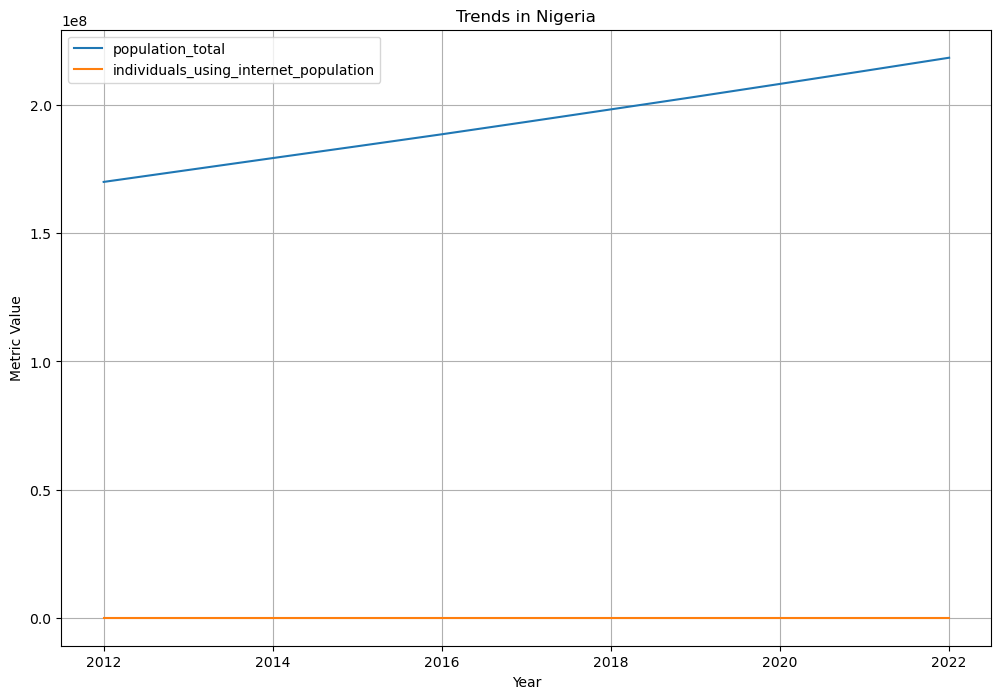

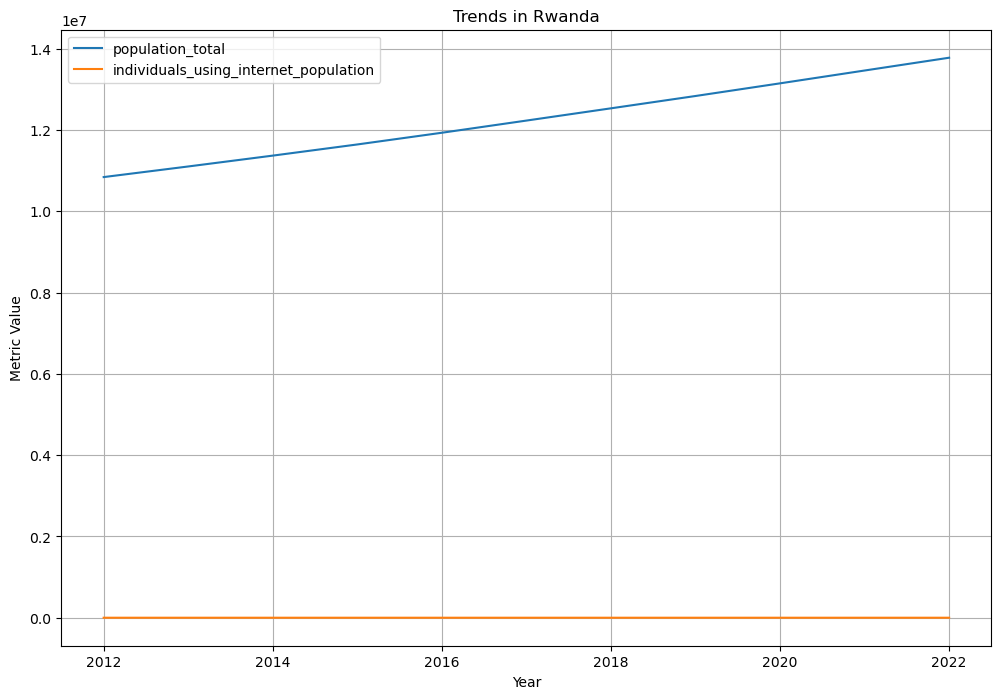

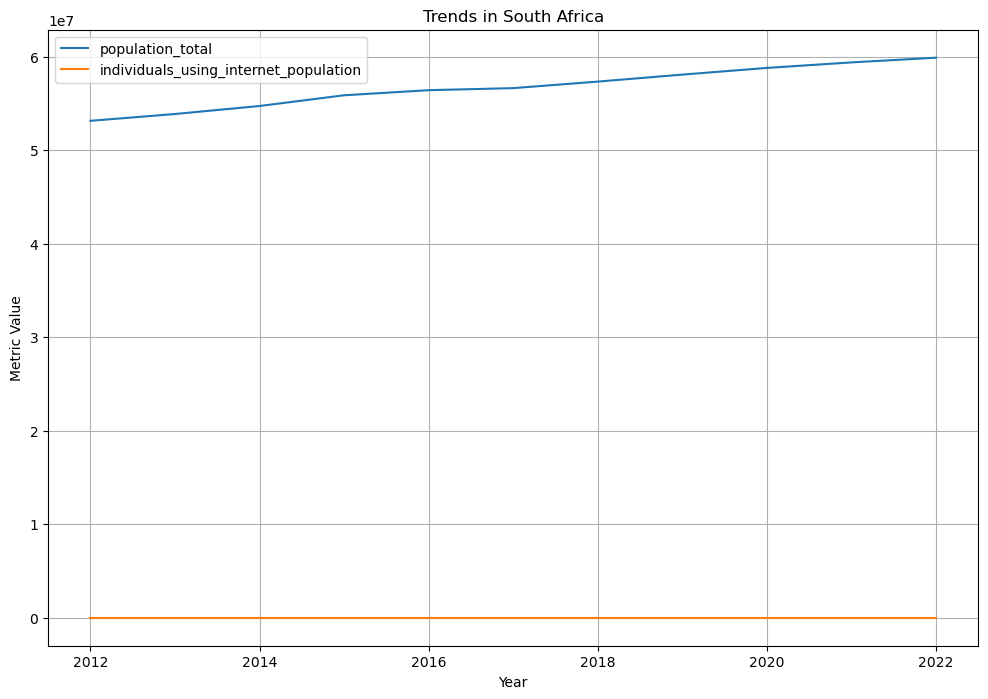

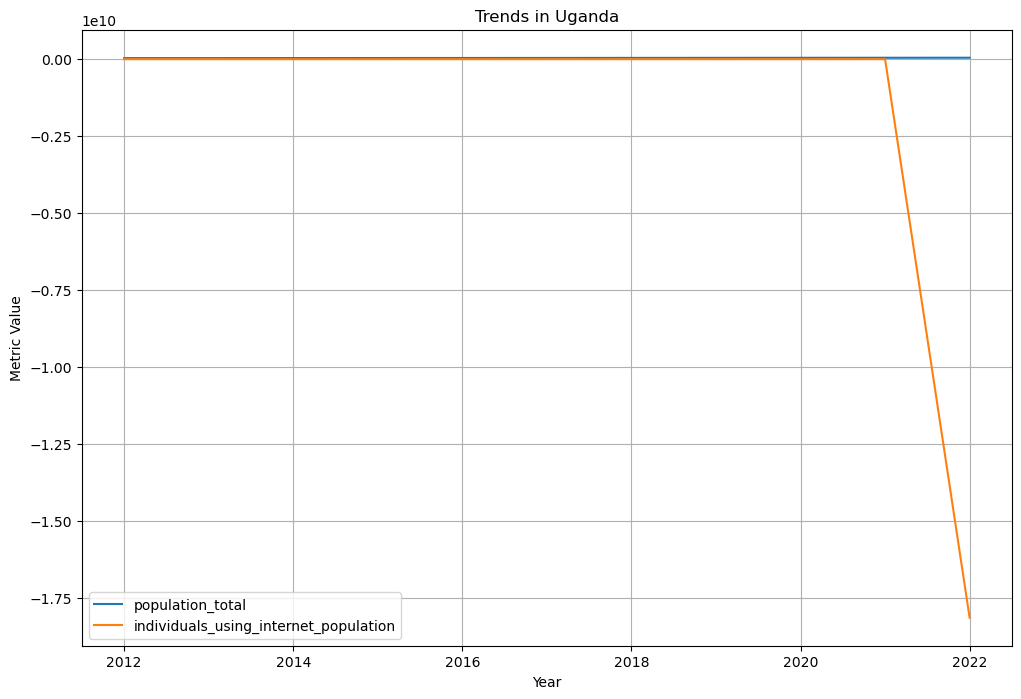

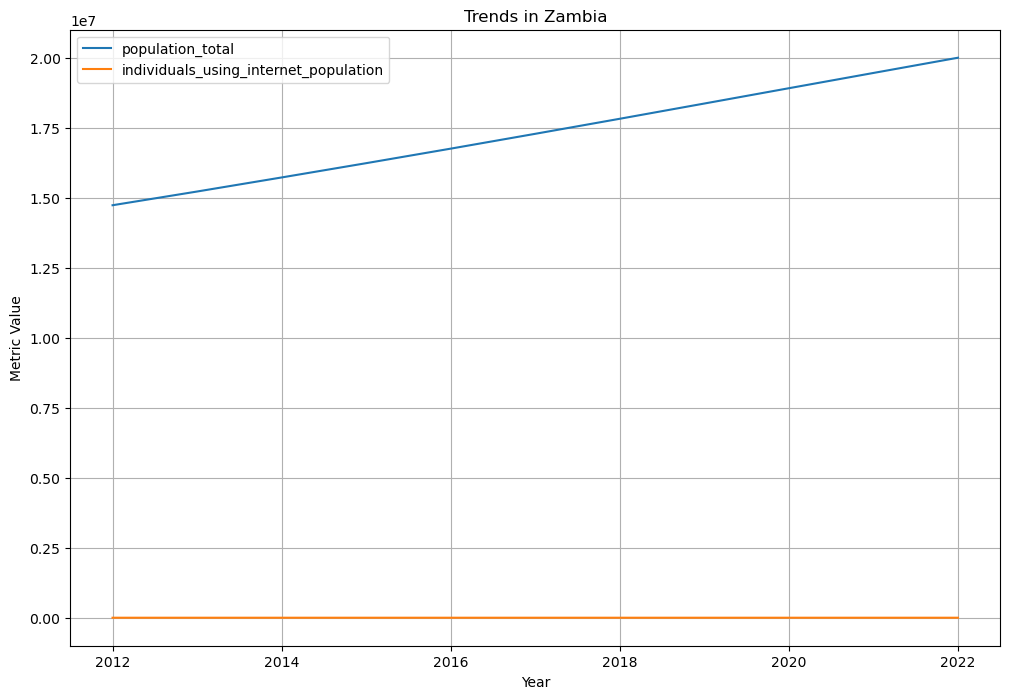

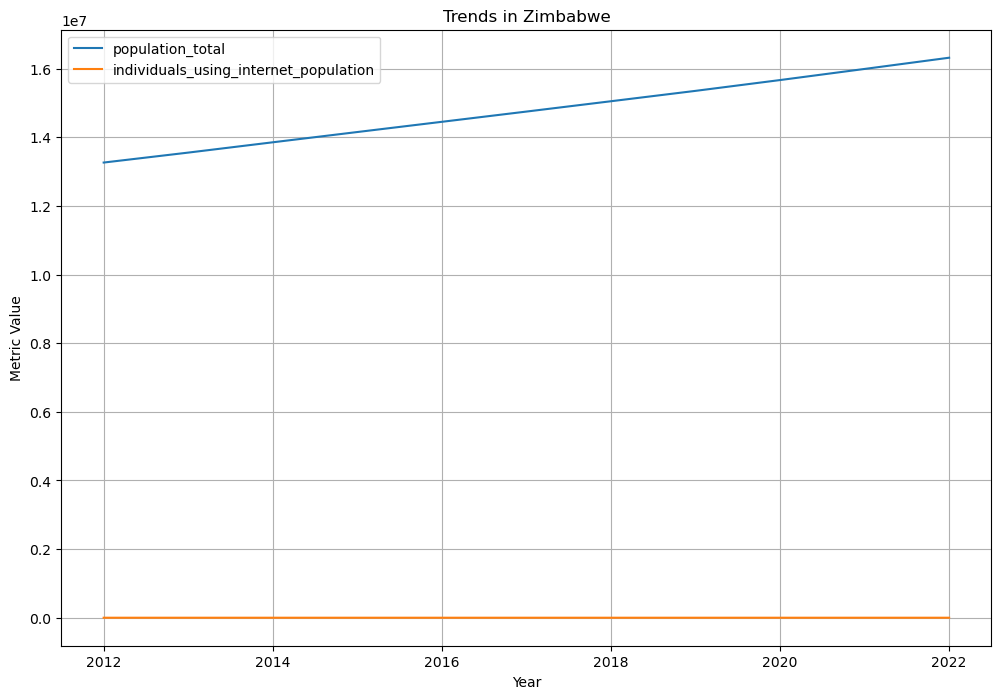

In [31]:
import matplotlib.pyplot as plt

# Set the metric to analyze over time
metrics = ['population_total','individuals_using_internet_population']

# Loop through each country and plot trends over time for each metric
unique_countries = data['country_name'].unique()

for country in unique_countries:
    country_data = data[data['country_name'] == country].sort_values(by='year')
    
    plt.figure(figsize=(12, 8))
    for metric in metrics:
        plt.plot(country_data['year'], country_data[metric], label=metric)
        
    plt.title(f'Trends in {country}')
    plt.xlabel('Year')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True)
    plt.show()
